In [112]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import svm
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import GridSearchCV

In [2]:
plt.style.use('ggplot') # make plots look better

#### Input

In [3]:
indir = 'input/DHI_ML/'
outdir="output/"

In [55]:
# read dataframes
df1=pd.read_csv(indir+'DHI_analysis_all_July.csv',index_col=None)
df2=pd.read_csv(indir+'All_DHI_analysis_april18.csv',index_col=None)

In [56]:
df1.rename({'amp_up_Coherence_normalized':'Coherence_normalized','farOVnear_updip':'AVO_Far_Near','comformability':'conformability_normalized'},inplace=True,axis=1)

In [57]:
df1.columns

Index(['block_name', 'up_down_ratio', 'AVO_Far_Near',
       'contactSharp_normalized', 'Coherence_normalized',
       'conformability_normalized', 'contact_CTD', 'area_updip',
       'HC_Volume_estimate', 'fajar', 'drill_result'],
      dtype='object')

In [58]:
df2.columns

Index(['event_name', 'up_down_ratio', 'contactSharp_normalized',
       'AVO_Far_Near', 'Coherence_normalized', 'conformability_normalized',
       'conformability', 'contact_CTD', 'Call', 'drill_result',
       'drill_result0'],
      dtype='object')

In [59]:
# common columns
common_cols=list(set(df1.columns).intersection(df2.columns))
print('Common features: '+str(common_cols))

Common features: ['Coherence_normalized', 'drill_result', 'AVO_Far_Near', 'conformability_normalized', 'contact_CTD', 'contactSharp_normalized', 'up_down_ratio']


In [60]:
df=pd.concat([df1[common_cols],df2[common_cols]])

In [61]:
df.dropna(inplace=True)

In [62]:
df.drop(['contact_CTD'],inplace=True,axis=1)

In [63]:
df

,Coherence_normalized,drill_result,AVO_Far_Near,conformability_normalized,contactSharp_normalized,up_down_ratio
0,0.27,Brine,0.79,0.267,0.05,1.08
1,0.15,HC,0.85,0.267,0.37,1.83
2,0.10,HC,1.21,0.100,0.20,1.31
3,0.34,HC,1.18,0.257,0.18,1.16
4,0.19,HC,1.34,0.220,0.36,2.47
5,0.15,HC,1.14,0.184,0.29,2.36
6,0.19,HC,1.16,0.248,0.30,2.38
7,0.74,Brine,0.74,0.925,-0.22,0.79
8,0.12,HC,1.21,0.163,0.31,2.03
9,0.38,HC,0.95,0.292,0.40,1.41


#### QC input

In [64]:
# remove outliers
# df=df[df['up_down_ratio']<5].copy()

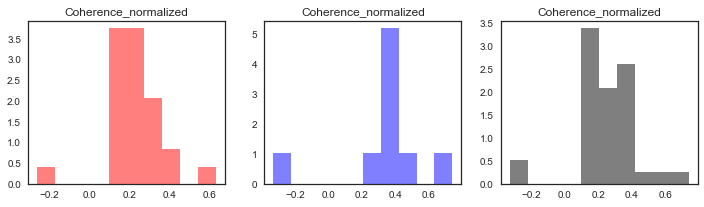

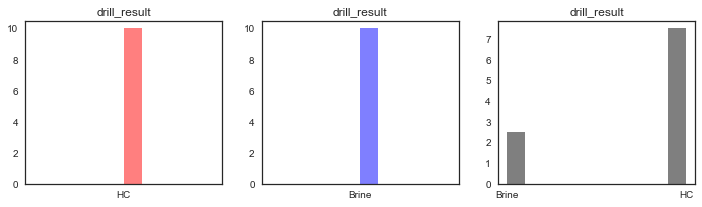

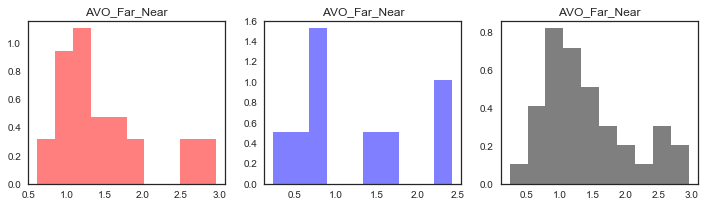

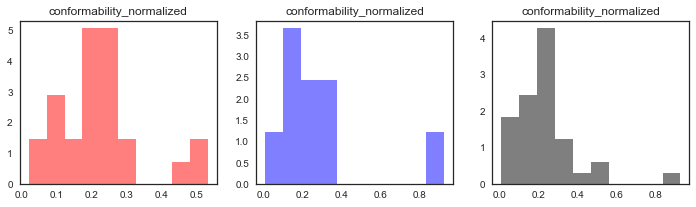

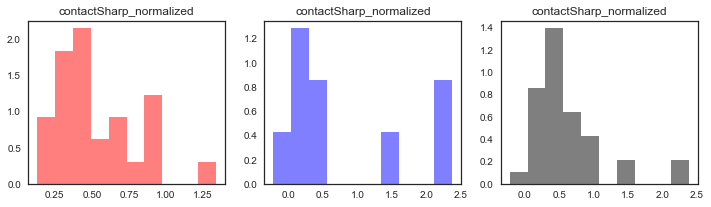

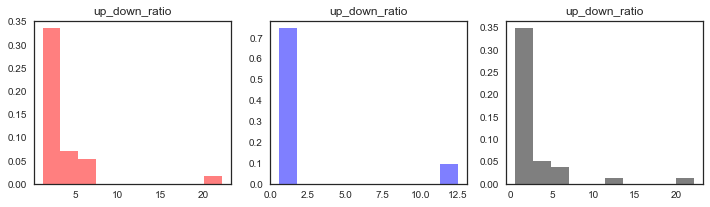

In [65]:
for col in df.columns:
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.hist(df[df.drill_result=='HC'][col], normed=1, facecolor='red', alpha=0.5)
    plt.title(col)
    plt.subplot(1,3,2)
    plt.hist(df[df.drill_result=='Brine'][col], normed=1, facecolor='blue', alpha=0.5)
    plt.title(col)
    plt.subplot(1,3,3)
    plt.hist(df[col], normed=1, facecolor='black', alpha=0.5)
    plt.title(col)
    plt.show()

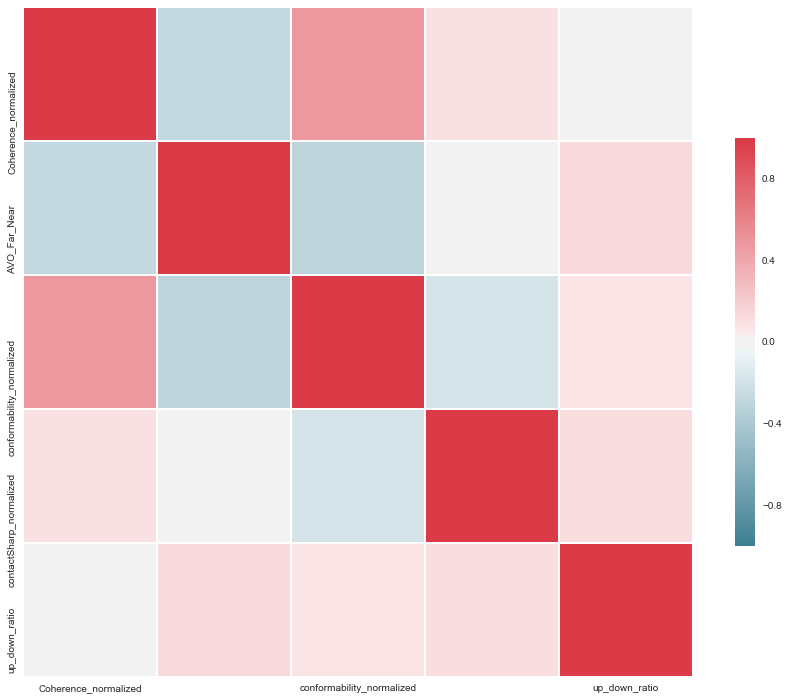

In [67]:
plt.clf()

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, vmin=-1., center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=2)

#### Plot labels

In [68]:
df.columns

Index(['Coherence_normalized', 'drill_result', 'AVO_Far_Near',
       'conformability_normalized', 'contactSharp_normalized',
       'up_down_ratio'],
      dtype='object')

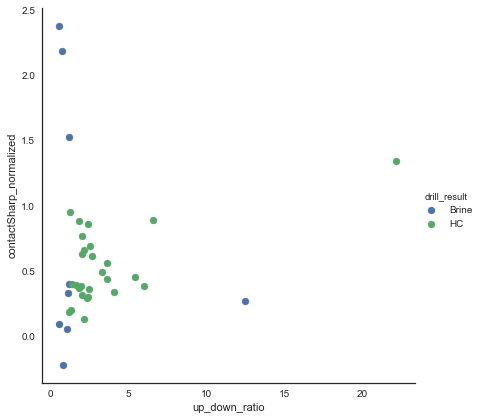

In [70]:
sns.FacetGrid(df, hue="drill_result",size=6).map(plt.scatter, "up_down_ratio", "contactSharp_normalized").add_legend()
plt.show()

#### Set features/labels

In [71]:
df = pd.get_dummies(df,columns=['drill_result']).copy()

In [72]:
df.columns

Index(['Coherence_normalized', 'AVO_Far_Near', 'conformability_normalized',
       'contactSharp_normalized', 'up_down_ratio', 'drill_result_Brine',
       'drill_result_HC'],
      dtype='object')

In [73]:
df

,Coherence_normalized,AVO_Far_Near,conformability_normalized,contactSharp_normalized,up_down_ratio,drill_result_Brine,drill_result_HC
0,0.27,0.79,0.267,0.05,1.08,1,0
1,0.15,0.85,0.267,0.37,1.83,0,1
2,0.10,1.21,0.100,0.20,1.31,0,1
3,0.34,1.18,0.257,0.18,1.16,0,1
4,0.19,1.34,0.220,0.36,2.47,0,1
5,0.15,1.14,0.184,0.29,2.36,0,1
6,0.19,1.16,0.248,0.30,2.38,0,1
7,0.74,0.74,0.925,-0.22,0.79,1,0
8,0.12,1.21,0.163,0.31,2.03,0,1
9,0.38,0.95,0.292,0.40,1.41,0,1


In [88]:
X = df[df.columns[0:5]].values
y = df[df.columns[6]].values

#### Split test/train

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 28 samples.
Testing set has 8 samples.


#### Scale features

In [149]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Train RF

In [150]:
rfc_param = [{'n_estimators':[5,10,15,20,40],'max_features':[2,3,4,5],}]
rfc = RandomForestClassifier(random_state = 0)
grid_search = GridSearchCV(rfc, rfc_param)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

In [151]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 40}

In [152]:
rfc = RandomForestClassifier(max_features=2,n_estimators=40,random_state = 0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [153]:
# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(X_test.shape[0], (y_test != y_pred).sum(), 100*(1-(y_test != y_pred).sum()/X_test.shape[0]))
)

Number of mislabeled points out of a total 8 points : 2, performance 75.00%


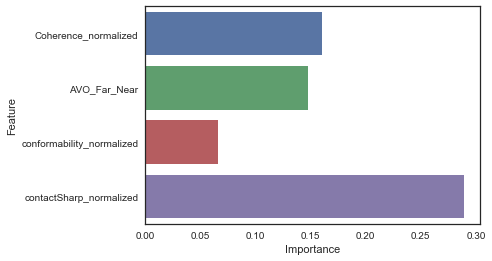

In [154]:
tmp=pd.DataFrame([rfc.feature_importances_,df.columns[0:4]]).T
tmp.columns=['Importance','Feature']
ax = sns.barplot(x="Importance", y="Feature", data=tmp)

#### Train Naive Bayes

In [155]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(X_test.shape[0], (y_test != y_pred).sum(), 100*(1-(y_test != y_pred).sum()/X_test.shape[0]))
)

Number of mislabeled points out of a total 8 points : 3, performance 62.50%


#### Train SVM

In [156]:
svmclass = svm.SVC()
svmclass.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(X_test.shape[0], (y_test != y_pred).sum(), 100*(1-(y_test != y_pred).sum()/X_test.shape[0]))
)

Number of mislabeled points out of a total 8 points : 3, performance 62.50%


#### Train XGBoost

In [158]:
xgb_param = [{'n_estimators':[5,10,15,20,40],'max_depth':[2,5,10,20]}]
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, xgb_param)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning Fals

C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning Fals

C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning Fals

C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning Fals

In [159]:
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 5}

In [160]:
xgb = XGBClassifier(max_depth=2,n_estimators=5)
xgb.fit(X_train, y_train)  
y_pred = xgb.predict(X_test)  

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(X_test.shape[0], (y_test != y_pred).sum(), 100*(1-(y_test != y_pred).sum()/X_test.shape[0]))
)

Number of mislabeled points out of a total 8 points : 0, performance 100.00%


C:\Apps\Anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


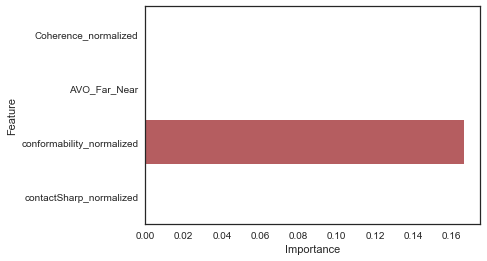

In [161]:
tmp=pd.DataFrame([xgb.feature_importances_,df.columns[0:4]]).T
tmp.columns=['Importance','Feature']
ax = sns.barplot(x="Importance", y="Feature", data=tmp)